In [34]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')


import importlib
import collective_Smatrix as tools
import imag_axis as imtools
import platonic_solid as positions

c = 3e8
hbar = 1.0545718e-34

In [30]:
# metallic nanoparticle
R = 20e-9
lambda_P = 136e-9
delta = 0 #plasma model
#delta = 4e-3 # Drude model

omega_P = 2*np.pi*c/lambda_P
k0 = omega_P/(np.sqrt(3)*c)

Gamma = (2/3) * R**3 * k0**4 # represents Gamma/c

## 1D arrays of metallic nanoparticles

In [60]:
N = 10
pos = np.zeros((3,N))

if N%2==1:
    # N odd
    nei = int((N-1)/2)
    pos[0,:] = np.arange(N)-nei
else:
    # N even
    nei = int(N/2)
    pos[0,:] = np.arange(N)+1/2-nei
print(pos[0,:])

a_vect = np.logspace(np.log10(50), np.log10(1000), 20)*1e-9
E_Cas = 0*a_vect
E_PW = 0*a_vect

[-4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5]


In [61]:
importlib.reload(imtools)

for i, a in enumerate(a_vect):
    ak0 = a*k0 # omega_0*a/c
    aGamma = a*Gamma  # Gamma*a/c
    
    I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos), 0, np.inf) 
    E_Cas[i] = I * hbar*c/(2*np.pi*a)
    if Ierr>1e-4*abs(I):
        print("CAS", I, Ierr)
    E_PW[i] = 0
    for m in range(N):
        for n in range(m+1,N):
            I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos[:,[m,n]]), 0, np.inf) 
            if Ierr>(1e-4*max(abs(E_PW[i]/(hbar*c/(2*np.pi*a))), abs(I))):
                print(I, Ierr)
            E_PW[i] += I * hbar*c/(2*np.pi*a)

/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:450: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
-2.767145030090131e-08 8.28808470713447e-09
-2.0461957076338306e-05 2.1026794430786227e-09
-1.084075379120494e-08 3.4402646781764216e-09
-2.0461957076338306e-05 2.1026794430786227e-09
CAS -7.483931321073612e-05 1.033520652675216e-08
-8.248448114438161e-06 1.1482312644539785e-09
-4.237763690156149e-09 1.3840479395260755e-09
-8.248448114438161e-06 1.1482312644539785e-09
CAS -2.9955429660077574e-05 4.493012663351606e-09
-3.3021385096281198e-06 4.991697854407886e-10
-1.6537896057224899e-09 5.466592829145078e-10
-3.3021385096281198e-06 4.991697854407886e-10
CAS -1.1918278167381883e-05 2.5366364118518717e-09
-1.3139962326296135e-06 2.9400605003877356e-10
-6.445610892650738e-10 2.139390310380151e-10
-1.3139962326296135e-06 2.9400605003877356e-10
-1.313996

In [62]:
Delta_1D_N10 = np.abs((E_Cas-E_PW)/E_Cas)

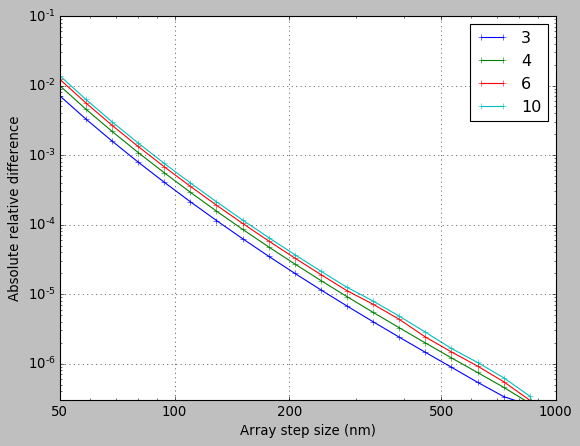

In [97]:
style.use('classic')
plt.loglog(a_vect*1e9,Delta_1D_N3,'+-')
plt.loglog(a_vect*1e9,Delta_1D_N4,'+-')
plt.loglog(a_vect*1e9,Delta_1D_N6,'+-')
plt.loglog(a_vect*1e9,Delta_1D_N10,'+-')
plt.xlim(50, 1000)
plt.xticks(ticks=[50, 100, 200, 500, 1000], labels=[50, 100, 200, 500, 1000])
plt.ylim(3e-7, 1e-1)
plt.xlabel("Array step size (nm)")
plt.ylabel("Absolute relative difference")
plt.grid(True)
plt.legend([3, 4, 6, 10])
plt.show()

## 2D arrays of nanoparticles

In [86]:
Nside = 4
N = Nside**2
pos = np.zeros((3,N))
v = np.arange(N)

if Nside%2==1:
    # N odd
    nei = int((Nside-1)/2)
    pos[0, :] = v%Nside - nei
    pos[1, :] = v//Nside - nei
else:
    # N even
    nei = int(Nside/2)
    pos[0, :] = v%Nside + 1/2 - nei
    pos[1, :] = v//Nside + 1/2 - nei

In [88]:
a_vect = np.logspace(np.log10(50), np.log10(1000), 20)*1e-9
E_Cas = 0*a_vect
E_PW = 0*a_vect

importlib.reload(imtools)

for i, a in enumerate(a_vect):
    ak0 = a*k0 # omega_0*a/c
    aGamma = a*Gamma  # Gamma*a/c
    
    I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos), 0, np.inf) 
    E_Cas[i] = I * hbar*c/(2*np.pi*a)
    if Ierr>1e-4*abs(I):
        print("CAS", I, Ierr)
    E_PW[i] = 0
    for m in range(N):
        for n in range(m+1,N):
            I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos[:,[m,n]]), 0, np.inf) 
            if Ierr>(1e-4*max(abs(E_PW[i]/(hbar*c/(2*np.pi*a))), abs(I))):
                print(I, Ierr)
            E_PW[i] += I * hbar*c/(2*np.pi*a)

/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:450: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
-2.767145030090131e-08 8.28808470713447e-09
-4.867733902854628e-06 1.1759204370664442e-08
-2.0461957076338306e-05 2.1026794430786227e-09
-1.084075379120494e-08 3.4402646781764216e-09
-2.0461957076338306e-05 2.1026794430786227e-09
-1.632182740741772e-08 6.76561355995123e-09
-8.248448114438161e-06 1.1482312644539785e-09
-4.237763690156149e-09 1.3840479395260755e-09
-8.248448114438161e-06 1.1482312644539785e-09
-7.736033731274289e-07 3.442758167482547e-09
-3.268684765598808e-08 2.2904283140986663e-09
-3.268684765598808e-08 2.2904283140986663e-09
-6.385180170443358e-09 2.59409054821247e-09
-7.736033731274289e-07 3.442758167482547e-09
CAS -8.554755446468806e-05 1.1680242845284182e-08
-3.3021385096281198e-06 4.991697854407886e-10
-1.6537896057224899e-09 

In [89]:
Delta_2D_N16 = np.abs((E_Cas-E_PW)/E_Cas)

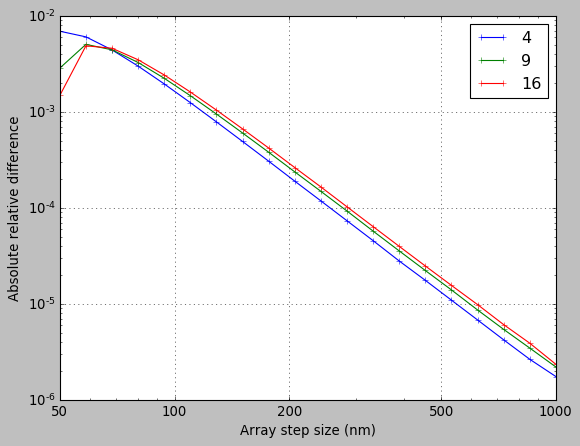

In [101]:
style.use('classic')
plt.loglog(a_vect*1e9, Delta_2D_N4,'+-')
plt.loglog(a_vect*1e9, Delta_2D_N9,'+-')
plt.loglog(a_vect*1e9, Delta_2D_N16,'+-')
plt.xlim(50, 1000)
plt.xticks(ticks=[50, 100, 200, 500, 1000], labels=[50, 100, 200, 500, 1000])
plt.ylim(1e-6, 1e-2)
plt.xlabel("Array step size (nm)")
plt.ylabel("Absolute relative difference")
plt.grid(True)
plt.legend([4, 9, 16])
plt.show()

## 3D arrays of nanoparticles

In [112]:
Nside = 3
N = Nside**3
pos = np.zeros((3,N))
v = np.arange(N)

if Nside%2==1:
    # N odd
    nei = int((Nside-1)/2)
    pos[0, :] = v%Nside - nei
    pos[1, :] = (v%Nside**2)//Nside - nei
    pos[2, :] = v//Nside**2 - nei
else:
    # N even
    nei = int(Nside/2)
    pos[0, :] = v%Nside +1/2 - nei
    pos[1, :] = (v%Nside**2)//Nside +1/2 - nei
    pos[2, :] = v//Nside**2 +1/2 - nei

In [113]:
a_vect = np.logspace(np.log10(50), np.log10(1000), 20)*1e-9
E_Cas = 0*a_vect
E_PW = 0*a_vect

importlib.reload(imtools)

for i, a in enumerate(a_vect):
    ak0 = a*k0 # omega_0*a/c
    aGamma = a*Gamma  # Gamma*a/c
    
    I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos), 0, np.inf) 
    E_Cas[i] = I * hbar*c/(2*np.pi*a)
    if Ierr>1e-4*abs(I):
        print("CAS", I, Ierr)
    E_PW[i] = 0
    for m in range(N):
        for n in range(m+1,N):
            I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos[:,[m,n]]), 0, np.inf) 
            if Ierr>(1e-4*max(abs(E_PW[i]/(hbar*c/(2*np.pi*a))), abs(I))):
                print(I, Ierr)
            E_PW[i] += I * hbar*c/(2*np.pi*a)

93e-11
-3.1554013270025726e-08 1.4359118491380245e-09
-2.8241405819736577e-09 4.713966846744493e-11
-1.1521786438008489e-10 2.451892478027021e-11
-1.1521786438008489e-10 2.451892478027021e-11
-2.8241405819736577e-09 4.713966846744493e-11
-3.1554013270025726e-08 1.4359118491380245e-09
-2.8241405819736577e-09 4.713966846744493e-11
-2.8241405819736577e-09 4.713966846744493e-11
-1.1521786438008489e-10 2.451892478027021e-11
-1.1521786438008489e-10 2.451892478027021e-11
-1.1521786438008489e-10 2.451892478027021e-11
-1.1521786438008489e-10 2.451892478027021e-11
-1.1521786438008489e-10 2.451892478027021e-11
-2.8241405819736577e-09 4.713966846744493e-11
-3.1554013270025726e-08 1.4359118491380245e-09
-2.8241405819736577e-09 4.713966846744493e-11
-3.1554013270025726e-08 1.4359118491380245e-09
-2.8241405819736577e-09 4.713966846744493e-11
-3.1554013270025726e-08 1.4359118491380245e-09
-3.1554013270025726e-08 1.4359118491380245e-09
-2.8241405819736577e-09 4.713966846744493e-11
-2.8241405819736577e-

In [114]:
Delta_3D_N27 = np.abs((E_Cas-E_PW)/E_Cas)

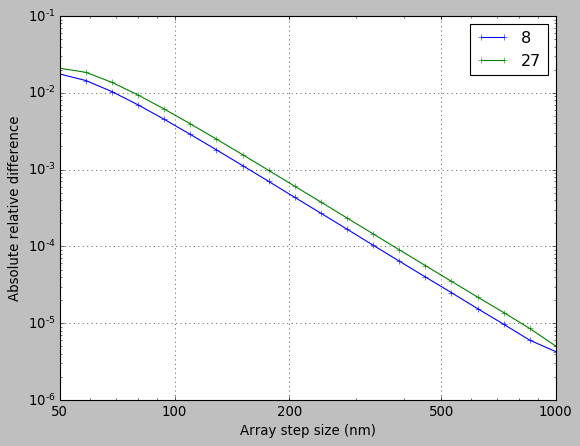

In [116]:
style.use('classic')
plt.loglog(a_vect*1e9, Delta_3D_N8,'+-')
plt.loglog(a_vect*1e9, Delta_3D_N27,'+-')
#plt.loglog(a_vect*1e9, Delta_3D_N64,'+-')
plt.xlim(50, 1000)
plt.xticks(ticks=[50, 100, 200, 500, 1000], labels=[50, 100, 200, 500, 1000])
plt.ylim(1e-6, 1e-1)
plt.xlabel("Array step size (nm)")
plt.ylabel("Absolute relative difference")
plt.grid(True)
plt.legend([8, 27])
plt.show()